# TEST NMS

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import torch
import time
batch = 4
K = 8
L = torch.rand(batch, K, K)
mask = (torch.rand(batch, K) > 0.5)

# ATTEMPT 4

In [ ]:
start_time = time.time()

n_c = torch.sum(mask, dim=-1)
n_max = n_c.max().item()
mask_s = (torch.arange(1,n_max+1).view(1,-1) <= n_c.view(-1,1))
mask_LL = torch.logical_and(mask.unsqueeze(-1),mask.unsqueeze(-2))
mask_ss = torch.logical_and(mask_s.unsqueeze(-1),mask_s.unsqueeze(-2))
matrix = torch.eye(n_max, dtype=L.dtype, device=L.device).expand(L.shape[-3], n_max, n_max).clone()
matrix[mask_ss] = L[mask_LL]
mid_time = time.time()


logdet_Ls = torch.logdet(matrix)
end_time = time.time()
print("Start to midpoint", mid_time - start_time)
print("midpoint to end", end_time - mid_time)

In [ ]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(12, 6))
n = 3
print(mask_ss.shape[-1], n_c[n], n_max)
axes[0].imshow(mask_ss[n])
axes[0].set_xticks(ticks=np.arange(mask_ss.shape[-1])+0.5)
axes[0].set_yticks(ticks=np.arange(mask_ss.shape[-1])+0.5)
axes[0].grid(which="major")

axes[1].imshow(mask_LL[n])
axes[1].set_xticks(ticks=np.arange(mask_LL.shape[-1])+0.5)
axes[1].set_yticks(ticks=np.arange(mask_LL.shape[-1])+0.5)
axes[1].grid(which="major")

In [ ]:
j=1
print(mask[j])
print(mask_LL[j])

# ATTEMPT 0

In [ ]:
start_time = time.time()

n_c = torch.sum(mask, dim=-1)
n_max = n_c.max().item()
mask_s = (torch.arange(1,n_max+1).view(1,-1) <= n_c.view(-1,1))
mask_ss = torch.einsum('bi,bj->bij', mask_s, mask_s)
mask_LL = torch.einsum('bi,bj->bij', mask, mask)
matrix = torch.eye(n_max, dtype=L.dtype, device=L.device).expand(L.shape[-3], n_max, n_max).clone()
matrix[mask_ss] = L[mask_LL]
mid_time = time.time()

logdet_Ls = torch.logdet(matrix)
end_time = time.time()
print("Start to midpoint", mid_time - start_time)
print("midpoint to end", end_time - mid_time)

# ATTEMPT 1

In [ ]:
start_time = time.time()

n_c = torch.sum(mask, dim=-1)
n_max = n_c.max().item()
matrix = torch.eye(n_max, dtype=L.dtype, device=L.device).expand(L.shape[-3], n_max, n_max).clone()
for i in range(batch):
    matrix[i, :n_c[i], :n_c[i]] = L[i, mask[i], :][:, mask[i]]  # WORKS BUT SLOW
mid_time = time.time()

logdet_Ls = torch.logdet(matrix)
end_time = time.time()
print("Start to midpoint", mid_time - start_time)
print("midpoint to end", end_time - mid_time)

# ATTEMPT 2

In [ ]:
start_time = time.time()

matrix = L.clone()
for i in range(batch):
    matrix[i, ~mask[i], :] = 0
    matrix[i, :, ~mask[i]] = 0
    matrix[i, ~mask[i], ~mask[i]] = 1
mid_time = time.time()

logdet_Ls = torch.logdet(matrix)
end_time = time.time()
print("Start to midpoint", mid_time - start_time)
print("midpoint to end", end_time - mid_time)

# ATTEMPT 3

In [ ]:
batch = 7
L = torch.randn(batch, 8, 8)
mask = (torch.rand(batch, 8) > 0.4)

In [ ]:
n_tmp = torch.sum(mask, dim=-1)
n_max = torch.max(n_tmp)
n_min = torch.min(n_tmp)
arange = torch.arange(n_min, n_max+1)
matrix = torch.eye(n_max, dtype=L.dtype, device=L.device).expand(L.shape[-3], n_max, n_max).clone()
print(arange)
print(n_tmp)
distinct_types = (n_tmp.view(-1,1) == arange.view(1,-1))  # shape: (batch, n_max-n_min+1)
print(distinct_types.shape)

for i, n_c in enumerate(arange):
    #print(i, n_c)
    #print(distinct_types[i])
    #print(distinct_types[:,i])
    a = matrix[distinct_types[:,i], :n_c, :n_c] 
    b = L[distinct_types[:,i]]
    x = mask[distinct_types[:,i]]
    y = L[x]
    print("A.shape ->",a.shape, b.shape, x.shape, y.shape)
    #print(aaa[:,c])

In [ ]:
n = torch.cumsum(mask, dim=-1)
n_max = torch.max(n[:,-1])
print(n)
print(n_max)

In [ ]:
new_index = index[...,None].expand_as
batch_index = torch.arange(L.shape[0]).view(-1,1).expand_as(index)
m = torch.gather(L[batch_index, index]
print(m.shape)

#print(batch_index.shape)

#L1[index,]
#m1 = torch.gather(L, dim=-1, index=index)
#m1.shape
#index2 = torch.stack((index,index),dim=-1)
#print(index2.shape)
#print(index[0])
#matrix = torch.eye(n_max, dtype=L.dtype, device=L.device).expand(L.shape[-3], n_max, n_max).clone()
#torch.gather(
#input, dim, index, *, sparse_grad=False, out=None))

In [ ]:
matrix.

In [ ]:
index.shape

pad the 

In [ ]:


batch = 2560
L = torch.randn(batch, 6, 6)
mask = (torch.rand(batch, 6) > 0.8)

start_time = time.time()
matrix = L.clone()
for i in range(batch):
    matrix[i, ~mask[i], :] = 0
    matrix[i, :, ~mask[i]] = 0
    matrix[i, ~mask[i], ~mask[i]] = 1

In [ ]:
mask[0]

In [ ]:
L[0]

In [ ]:
matrix[0]

In [ ]:


%matplotlib inline
import matplotlib.pyplot as plt

import torch
import torch.nn.functional as F

In [ ]:
import genus
from genus.model_parts import tgrid_to_bb
from genus.util_ml import sample_c_grid
from genus.util_vis import show_batch, draw_bounding_boxes
from genus.util import convert_to_box_list
from genus.non_max_suppression import NonMaxSuppression

In [ ]:
from genus.util_ml import Grid_DPP

In [ ]:
grid_dpp = Grid_DPP(length_scale=10, weight=1.0)


In [ ]:
a = torch.zeros((20,20))
c1 = grid_dpp.sample(size=a.size())
print(c1.shape)
c2 = grid_dpp.sample(size=a.size())
print(c2.shape)

In [ ]:
print(c1.shape)
print(grid_dpp.finite_dpp.L.shape)
logp = grid_dpp.log_prob(c1)
print(logp.shape)
logp = grid_dpp.log_prob(c1[0])
print(logp.shape)
logp = grid_dpp.log_prob(c1[...,:10,10:15])
print(logp.shape)

In [ ]:
c.shape
show_batch(c[0].float())

In [ ]:
b, small_w,small_h = 1, 20, 20
width_input_image, height_input_image = 80, 80
min_box_size, max_box_size = 15, 35
            
pgrid = torch.rand((b,1,small_w,small_h))
tgrid = 0.5 * torch.ones((b,4,small_w,small_h))
bb = tgrid_to_bb(tgrid, 
                 width_input_image,
                 height_input_image,
                 min_box_size,
                 max_box_size)

c_before_nms = sample_c_grid(prob_grid=(pgrid>0.8).float(),
                             similarity_matrix=None,
                             noisy_sampling=True,
                             sample_from_prior=False,
                             mc_samples=1).squeeze(0)
print(c_before_nms.sum())

In [ ]:
c_n = convert_to_box_list(c_before_nms).squeeze(-1)
bb_ideal = draw_bounding_boxes(bounding_box=bb,
                               width=width_input_image, 
                               height=height_input_image,
                               c=c_n,
                               color="green")
show_batch(bb_ideal)

In [ ]:
score_b1wh = c_before_nms + pgrid
score = convert_to_box_list(score_b1wh).squeeze(dim=-1)

print(score_b1wh.shape)
print(score.shape)
print(bb.bx.shape)

nms_output = NonMaxSuppression.compute_mask_and_index(score=score,
                                                      bounding_box=bb,
                                                      iom_threshold=0.7,
                                                      k_objects_max=10,
                                                      topk_only=False)

In [ ]:
(nms_output.k_mask_n * c_n).sum()

In [ ]:
bb_ideal_after = draw_bounding_boxes(bounding_box=bb,
                                     width=width_input_image, 
                                     height=height_input_image,
                                     c=(nms_output.k_mask_n * c_n),
                                     color="red")
show_batch(torch.cat((bb_ideal,bb_ideal_after), dim=0))

In [ ]:
x = torch.linspace(-10,10,100)
p = torch.tensor(0.01)
print(p.log(), (1-p).log())
H = F.sigmoid(x) * F.logsigmoid(x) + F.sigmoid(-x) * F.logsigmoid(-x)
KL = F.sigmoid(x) * (F.logsigmoid(x) - p.log()) + F.sigmoid(-x) * (F.logsigmoid(-x) - (1-p).log())

KLp = F.sigmoid(x) * (F.logsigmoid(x) - p.log()) 
KLm = F.sigmoid(-x) * (F.logsigmoid(-x) - (1-p).log())

#plt.plot(x,F.logsigmoid(x))
plt.plot(x,5*F.sigmoid(x),label="sigmoid")
#plt.plot(x,-3*F.sigmoid(x)*F.sigmoid(-x),label="p*(1-p)")
#plt.plot(x,H,label="H")
plt.plot(x,KL,label="KL")
#plt.plot(x,KLp,label="KLp")
#plt.plot(x,KLm,label="KLm")
plt.legend()

In [ ]:
import numpy
p = 1E-4
numpy.log(p) - numpy.log(1-p)

In [ ]:
a = torch.randn((3,2,3,4))
print(a.shape)
print(a.squeeze(dim=0).shape)

In [ ]:
size = a.size()
print(size, type(size), size[-1])

In [ ]:
len(size)

In [ ]:
size2 = [1]+ list(size)
size2

In [ ]:
show_batch(bb_ideal)

In [ ]:
show_batch(c_before_nms)

In [ ]:
from genus.model_parts import tgrid_to_bb



In [ ]:
a = torch.rand(5, requires_grad=True)
b = torch.rand(5, requires_grad=True)
print(a.dtype, type(a))


optim1 = torch.optim.SGD([{'params': a, 'lr': 0.1}])
optim2 = torch.optim.SGD([{'params': b, 'lr': 0.1}])



#scheduler = torch.optim.lr_scheduler.StepLR(optimizer1,
#                                            step_size=1,
#                                            gamma=0.5,
#                                            last_epoch=-1)

a_list, b_list = [], []
for n in range(10):
    a_list.append(a.mean().detach().item())
    b_list.append(b.mean().detach().item())
    print("a ->",a_list[-1],"b ->",b_list[-1])
    optim1.zero_grad()
    optim2.zero_grad()
    (a+b).mean().backward()
    optim1.step()
    optim2.step()

In [ ]:
print(a_list)
plt.plot(a)

In [ ]:
a = torch.ones(5, requires_grad=True)
b = 2*a
b.register_hook(lambda x: print("printing",x))
b.register_hook(lambda x: x.clamp(min=-0.01, max=0.01)) 
b.retain_grad()
b.register_hook(lambda x: print("printing",x))
c = b.mean()
print("C",c)
c.backward() 

print("A GRAD",a.grad)
print("B grad",b.grad)

In [ ]:
x = torch.randn(4)
b = x.mean()
print(torch.sign(x-b))
print(torch.sign(0*x))

In [3]:
from genus.model_parts import inverse_linear_exp_activation, linear_exp_activation
import torch

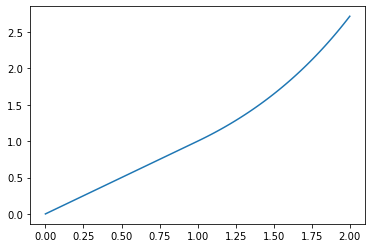

In [9]:
x = torch.linspace(0,2,100)
y = linear_exp_activation(x)
x1 = inverse_linear_exp_activation(y)
%matplotlib inline
import matplotlib.pyplot as plt


plt.plot(x,y)
#plt.plot(x1,y)
#plt.grid()
#plt.plot(x,x1)

In [ ]:
tgrid_to_bb


delta_mbn = compute_average_in_box(delta_imgs=(imgs_bcwh - out_background_mbcwh).abs(),
                                                   bounding_box=bounding_box_mbn)
                unit_ranking_mbn = (compute_ranking(delta_mbn) + 1).float() / (delta_mbn.shape[-1] + 1)  # in (0,1)

                nms_pretraining: NmsOutput = NonMaxSuppression.compute_mask_and_index(score_n=unit_ranking_mbn,
                                                                                      bounding_box_n=bounding_box_mbn,
                                                                                      iom_threshold=iom_threshold,
                                                                                      k_objects_max=k_objects_max,
                                                                                      topk_only=combined_topk_only)
                unit_ranking_mb1wh = invert_convert_to_box_list(unit_ranking_mbn.unsqueeze(dim=-1),
                                                                original_width=unet_output.logit.shape[-2],
                                                                original_height=unet_output.logit.shape[-1])
                k_mask_pretraining_mb1wh = invert_convert_to_box_list(nms_pretraining.k_mask_n.unsqueeze(dim=-1),
                                                                      original_width=unet_output.logit.shape[-2],
                                                                      original_height=unet_output.logit.shape[-1])
                p_target_mb1wh = unit_ranking_mb1wh * k_mask_pretraining_mb1wh